In [98]:
##Imports¶


In [142]:
#general imports
import pandas as pd
import numpy as np

#statsmodels for regression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

#scipy for testing
from scipy import stats

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime


In [100]:
##Bike Data

In [101]:
df_bikes = pd.read_csv('../data/philadelphia_2017.csv')
df_weather = pd.read_csv('../data/weather_hourly_philadelphia.csv')

df_bikes.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name
0,1/1/2017 0:05,1/1/2017 0:16,3046,3041,5347,Indego30,2nd & Market,"Girard Station, MFL"
1,1/1/2017 0:21,1/1/2017 0:57,3110,3054,3364,Walk-up,Del. River Trail & Penn St.,Rodin Museum
2,1/1/2017 0:22,1/1/2017 0:57,3110,3054,2536,Walk-up,Del. River Trail & Penn St.,Rodin Museum
3,1/1/2017 0:27,1/1/2017 0:39,3041,3005,5176,Indego30,"Girard Station, MFL","Welcome Park, NPS"
4,1/1/2017 0:28,1/1/2017 0:36,3047,3124,5370,Walk-up,"Independence Mall, NPS",Race Street Pier


In [102]:
df_bikes.describe()

,start_station_id,end_station_id,bike_id
count,788907.000000,788907.000000,788907.000000
mean,3057.400081,3056.431487,5428.980913
std,41.126829,41.108792,3221.972215
min,3000.000000,3000.000000,0.000000
25%,3023.000000,3023.000000,3350.000000
50%,3050.000000,3049.000000,3703.000000
75%,3075.000000,3074.000000,5370.000000
max,3170.000000,3170.000000,11965.000000


In [103]:
##Weather Data

In [104]:
df_weather.head()

,date_time,max_temp,min_temp,precip
0,2015-01-02 01:00:00,3.3,3.3,0.0
1,2015-01-02 02:00:00,2.8,2.8,0.0
2,2015-01-02 03:00:00,2.2,2.2,0.0
3,2015-01-02 04:00:00,0.6,0.6,0.0
4,2015-01-02 05:00:00,1.1,1.1,0.0


In [105]:
df_weather.describe()

,max_temp,min_temp,precip
count,43785.000000,43785.000000,43785.000000
mean,14.204796,14.121300,0.087770
std,10.272673,10.259344,0.282963
min,-16.700000,-16.700000,0.000000
25%,6.100000,6.100000,0.000000
50%,15.000000,14.400000,0.000000
75%,22.800000,22.800000,0.000000
max,36.700000,36.700000,1.000000


In [106]:
"""
Die Funktion ist an sich jetzt richtig, die Wetterdaten müssen nur noch sortiert werden, hab ich jetzt leider nicht gerafft,
dass sie es nicht gemacht haben / die Daten extra kaputt gemacht haben :D
"""
def get_datetime(date_string):
    new_string = ""
    running_string = ""
    for char in date_string:
        if char == "/" or  char == ":" or char == " ":
            if len(running_string) == 1:
                running_string = "0" + running_string
            new_string += running_string + char
            running_string = ""
        else:
            running_string += char
    new_string += running_string
    if len(new_string) > 16:
        return datetime.strptime(new_string, '%m/%d/%Y %H:%M:%S')
    else:
        return datetime.strptime(new_string, '%m/%d/%Y %H:%M')

def would_be_rounded_up(num):
    if round(num) == int(num) + 1:
        return True
    else:
        return False

def get_temperature(start_time, end_time):
    duration_of_travel = end_time-start_time
    average_timestamp = end_time - datetime.fromisoformat("2017-01-01 00:00:00") - duration_of_travel/2
    weather_row = 17521 + average_timestamp.total_seconds()/3600
    as_int = int(weather_row)
    if would_be_rounded_up(weather_row):
        rows = [[df_weather["min_temp"][as_int],df_weather["max_temp"][as_int]], [df_weather["min_temp"][as_int+1],df_weather["max_temp"][as_int+1]]]
    else:
        rows = [[df_weather["min_temp"][as_int],df_weather["max_temp"][as_int]], [df_weather["min_temp"][as_int-1],df_weather["max_temp"][as_int-1]]]
    result = 0;
    avg_temp = (rows[0][0] + rows[0][1]) / 2
    result += avg_temp/(weather_row - int(weather_row))
    avg_temp = (rows[1][0] + rows[1][1]) / 2
    result += avg_temp/(1 - weather_row - int(weather_row))

    return result



def temperature_at_time(start_time, end_time):
    start_time = get_datetime(start_time)
    end_time = get_datetime(end_time)
    print(start_time)
    print(get_temperature(start_time, end_time))





temperature_at_time(df_bikes["start_time"][10000],df_bikes["end_time"][10000])

2017-01-13 06:34:00
16.243590901009362


In [107]:
unique_station_ids = set(df_bikes['start_station_id'])
id_mapped_to_station = []
for id in unique_station_ids:
    this_station = []
    this_station.append(id)
    this_station.append(df_bikes.loc[df_bikes['start_station_id'] == id].iloc[0]['start_station_name'])
    id_mapped_to_station.append(this_station)
print(id_mapped_to_station)

[[3072, 'Front & Carpenter'], [3073, '9th & Spring Garden'], [3074, '44th & Walnut'], [3075, 'Fairmount & Ridge'], [3077, '17th & Girard'], [3078, '19th & Market'], [3083, '3083'], [3086, 'Broad & Christian'], [3088, '3rd & Girard'], [3093, '33rd & Diamond'], [3095, '29th & Diamond'], [3096, '29th & Dauphin'], [3097, 'Berks Station, MFL'], [3098, '10th & Federal'], [3099, '4th & Washington'], [3100, 'Moyamensing & Tasker'], [3101, '11th & South'], [3102, 'Pennsylvania & Fairmount Perelman Building'], [3103, '27th & Master, Athletic Recreation Center'], [3104, '34th & Mantua'], [3105, 'Penn Treaty Park'], [3106, '33rd & Dauphin'], [3107, '33rd & Reservoir'], [3108, '15th & Market'], [3109, 'Parkside & Girard'], [3110, 'Del. River Trail & Penn St.'], [3111, 'Parkside & Belmont, Case Building'], [3112, '48th & Spruce'], [3113, 'Philadelphia Zoo'], [3114, '22nd & Federal'], [3115, '19th & Girard, PTTI'], [3116, 'Barnes Foundation'], [3117, 'ParkWest Town Center'], [3118, '46th Street Stati

In [108]:
# das noch mit den IDs oder Namen der Stations matchen
starting_id_loans = []
for id in unique_station_ids:
    starting_id_loans.append(sum(1 for i in df_bikes['start_station_id'] if i == id))
print(starting_id_loans)

[4674, 6124, 5374, 5451, 2214, 10971, 10, 5653, 2802, 769, 1605, 990, 2628, 4731, 4372, 6517, 13888, 11755, 1095, 1836, 1169, 1206, 1394, 13004, 1402, 3423, 1691, 4840, 859, 6487, 3161, 48, 879, 2494, 2092, 5455, 5637, 844, 1339, 5178, 10237, 4049, 1662, 782, 1483, 3459, 1269, 5723, 2228, 2879, 4064, 2786, 4522, 3733, 4718, 588, 971, 133, 967, 3636, 110, 9020, 4688, 7828, 12102, 2966, 11430, 23655, 4242, 15344, 4919, 1892, 6552, 754, 1413, 11657, 4099, 16036, 19828, 14391, 24828, 5001, 6628, 8498, 4577, 12775, 11648, 9002, 6071, 16343, 8485, 7854, 5434, 2810, 6744, 10015, 5111, 9965, 4333, 5319, 19222, 9380, 9071, 5591, 7454, 9335, 12305, 8139, 16405, 6208, 8989, 14204, 9967, 8090, 8406, 10236, 6611, 12844, 9215, 1426, 10832, 750, 7750, 6370, 5396, 4394]


In [109]:
# das noch mit den IDs oder Namen der Stations matchen
ending_id_loans = []
for id in unique_station_ids:
    ending_id_loans.append(sum(1 for i in df_bikes['end_station_id'] if i == id))
print(starting_id_loans)

[4674, 6124, 5374, 5451, 2214, 10971, 10, 5653, 2802, 769, 1605, 990, 2628, 4731, 4372, 6517, 13888, 11755, 1095, 1836, 1169, 1206, 1394, 13004, 1402, 3423, 1691, 4840, 859, 6487, 3161, 48, 879, 2494, 2092, 5455, 5637, 844, 1339, 5178, 10237, 4049, 1662, 782, 1483, 3459, 1269, 5723, 2228, 2879, 4064, 2786, 4522, 3733, 4718, 588, 971, 133, 967, 3636, 110, 9020, 4688, 7828, 12102, 2966, 11430, 23655, 4242, 15344, 4919, 1892, 6552, 754, 1413, 11657, 4099, 16036, 19828, 14391, 24828, 5001, 6628, 8498, 4577, 12775, 11648, 9002, 6071, 16343, 8485, 7854, 5434, 2810, 6744, 10015, 5111, 9965, 4333, 5319, 19222, 9380, 9071, 5591, 7454, 9335, 12305, 8139, 16405, 6208, 8989, 14204, 9967, 8090, 8406, 10236, 6611, 12844, 9215, 1426, 10832, 750, 7750, 6370, 5396, 4394]


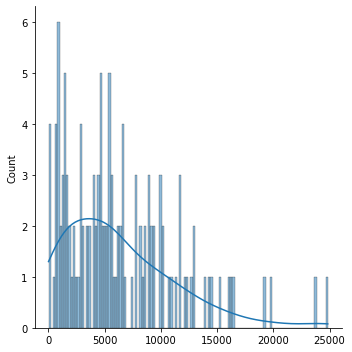

In [110]:
# keine Ahnung was da angezeigt wird, aber dachte es könnte nice sein
sns.displot(starting_id_loans, bins=unique_station_ids.__len__(),kde=True)
plt.show()

Text(0, 0.5, 'EndID')

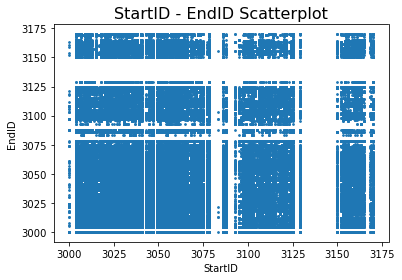

In [111]:
# schade, ich erkenne kein Muster :D
fig, scplot_ids = plt.subplots(nrows=1,ncols=1)
scplot_ids.scatter(df_bikes['start_station_id'],df_bikes['end_station_id'],s=3)
scplot_ids.set_title("StartID - EndID Scatterplot",fontsize=16)
scplot_ids.set_xlabel("StartID")
scplot_ids.set_ylabel("EndID")
#scplot_ids.show()

In [112]:
# Zeiten in Daytime umgewandelt und Leihdauer hinzugefügt
df_bikes["start_time"] = pd.to_datetime(df_bikes["start_time"], dayfirst = True)

df_bikes["end_time"] = pd.to_datetime(df_bikes["end_time"], dayfirst = True)

df_bikes['duration'] = df_bikes['end_time'] - df_bikes['start_time']

df_bikes.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,duration
0,2017-01-01 00:05:00,2017-01-01 00:16:00,3046,3041,5347,Indego30,2nd & Market,"Girard Station, MFL",0 days 00:11:00
1,2017-01-01 00:21:00,2017-01-01 00:57:00,3110,3054,3364,Walk-up,Del. River Trail & Penn St.,Rodin Museum,0 days 00:36:00
2,2017-01-01 00:22:00,2017-01-01 00:57:00,3110,3054,2536,Walk-up,Del. River Trail & Penn St.,Rodin Museum,0 days 00:35:00
3,2017-01-01 00:27:00,2017-01-01 00:39:00,3041,3005,5176,Indego30,"Girard Station, MFL","Welcome Park, NPS",0 days 00:12:00
4,2017-01-01 00:28:00,2017-01-01 00:36:00,3047,3124,5370,Walk-up,"Independence Mall, NPS",Race Street Pier,0 days 00:08:00


In [113]:
df_bikes.notnull()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,duration
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
788902,True,True,True,True,True,True,True,True,True
788903,True,True,True,True,True,True,True,True,True
788904,True,True,True,True,True,True,True,True,True
788905,True,True,True,True,True,True,True,True,True


In [114]:
df_bikes.dropna(axis=0,inplace=True)
len(df_bikes)-len(df_bikes.dropna())

0

In [115]:
# da hat sich jemand gegönnt :D
#max(df_bikes['duration'])

In [116]:
# auch nicht schlecht
#min(df_bikes['duration'])

In [117]:
sumIndego30 = sum(1 for i in df_bikes["user_type"] if i == 'Indego30')
sumIndego30

667441

In [118]:
sumWalkUp = sum(1 for i in df_bikes["user_type"] if i == 'Walk-up')
sumWalkUp

100661

In [119]:
sumIndegoFlex = sum(1 for i in df_bikes["user_type"] if i == 'IndegoFlex')
sumIndegoFlex

6034

In [120]:
sumOneDayPass = sum(1 for i in df_bikes["user_type"] if i == 'One Day Pass')
sumOneDayPass

6328

In [121]:
sumTwoDayPass = sum(1 for i in df_bikes["user_type"] if i == 'Two Day Pass')
sumTwoDayPass

1603

In [122]:
sumIndego365 = sum(1 for i in df_bikes["user_type"] if i == 'Indego365')
sumIndego365

6840

In [123]:
user_type_dict = {'Indego30': sumIndego30,
                  'WalkUp': sumWalkUp,
                  'IndegoFlex': sumIndegoFlex,
                  'OneDayPass': sumOneDayPass,
                  'TwoDayPass': sumTwoDayPass,
                  'Indego365': sumIndego365
                 }
user_type = pd.Series(user_type_dict)
user_type

Indego30      667441
WalkUp        100661
IndegoFlex      6034
OneDayPass      6328
TwoDayPass      1603
Indego365       6840
dtype: int64

In [124]:
#df_bikes = pd.read_csv('philadelphia_2017.csv')
#df_weather = pd.read_csv('weather_hourly_philadelphia.csv')

def get_datetime(date_string):
    if date_string.__contains__("/"):
        new_string = ""
        running_string = ""
        for char in date_string:
            if char == "/" or  char == ":" or char == " ":
                if len(running_string) == 1:
                    running_string = "0" + running_string
                new_string += running_string + char
                running_string = ""
            else:
                running_string += char
        new_string += running_string
        if len(new_string) > 16:
            return datetime.strptime(new_string, '%m/%d/%Y %H:%M:%S')
        else:
            return datetime.strptime(new_string, '%m/%d/%Y %H:%M')
    else:
        return datetime.fromisoformat(date_string)

def compare_datetime(start, end):
    start_datetime = get_datetime(start)
    end_datetime = get_datetime(end)
    duration_of_travel = end_datetime - start_datetime
    seconds = duration_of_travel.total_seconds()
    return seconds/60

ride_lengths = []
df_bikes["ride_duration_minutes"] = df_bikes.apply(lambda x: (compare_datetime(x["start_time"],x["end_time"])), axis=1)

for label, content in df_bikes.iterrows():
    ride_lengths.append(content["ride_duration_minutes"])

ride_lengths_np = np.array(ride_lengths)
iqr = stats.iqr(ride_lengths_np)
iqr

q1,q3 = np.percentile(ride_lengths_np, [25,95])

lower_range = q1 - (1.5*iqr)
upper_range = q3 + (1.5*iqr)

#A ride, can't be shorter than 0 Minutes obviously
if lower_range < 0:
    lower_range = 0

df_bikes.drop(df_bikes[ (df_bikes.ride_duration_minutes > upper_range) | (df_bikes.ride_duration_minutes < lower_range)

SyntaxError: unexpected EOF while parsing (<ipython-input-124-669c66e15812>, line 51)

In [125]:
#Wert müsste ungefähr passen. Laut Internetseite von Indego haben die seit 2019 1400 Fahrräder in der Flotte.

unique_bike_id = set(df_bikes['bike_id'])

print(len(unique_bike_id))

1250


In [126]:
#type in the parameters to get the utilization in % at this point of time
def utilization(year, month, day, hour, minute):
    point_of_time = datetime(year, month, day, hour, minute)
    df_smaller_pot = df_bikes[df_bikes["start_time"] < point_of_time]
    df_greater_pot = df_smaller_pot[df_smaller_pot["end_time"] > point_of_time]
    util = (len(df_greater_pot) / 1250) *100
    return util

utilization(2017, 1, 3, 12, 30)

#check_start[]
#for i in df_bikes["start_time"]:
#    if i < point_of_time:



3.2800000000000002

In [127]:
#type in the parameters to get the percentage of available bikes at this point of time
def available_bikes(year, month, day, hour, minute):
    point_of_time = datetime(year, month, day, hour, minute)
    df_smaller_pot = df_bikes[df_bikes["start_time"] < point_of_time]
    df_greater_pot = df_smaller_pot[df_smaller_pot["end_time"] > point_of_time]
    avlbl = ((1250 - len(df_greater_pot)) / 1250) *100
    return avlbl

available_bikes(2017, 1, 3, 12, 3)


97.04

In [128]:
#creates an array containing the utilization of every minute within one hour
util_arr = []
for i in range(0, 59):
    util_arr.append(utilization(2017, 1, 3, 12, i))
print(max(util_arr))


3.5999999999999996


In [129]:
#sums up the number of loans of one specific bike in the dataset within 2017 (type in bike ID)
def calc_unique_bike_amount_rides(v):
    unique_bike_amount_rides = sum(1 for i in df_bikes["bike_id"] if i == v)
    return print(unique_bike_amount_rides)

calc_unique_bike_amount_rides(2536)

622


In [132]:

#sums up all loans for one entire day in 2017
def loans_per_day(month, day):
    day_in_2017_start = datetime(2017, month, day, 0, 0)
    day_in_2017_end = datetime(2017, month, day, 23, 59)
    df_day_start = df_bikes[df_bikes["start_time"] >= day_in_2017_start]
    df_day_end = df_day_start[df_day_start["start_time"] <= day_in_2017_end]
    return len(df_day_end)


## WARUM geht das nicht so? :(
#def loans_per_day(month, day):
#    day_in_2017_start = datetime(2017, month, day, 0, 0)
#    day_in_2017_end = datetime(2017, month, day, 23, 59)
#    day_loans = sum(1 for i in df_bikes["start_time"] if i >= day_in_2017_start & i <= day_in_2017_end)
#    return day_loans

loans_per_day(1, 2)


1516

In [133]:
#creates an array containing the total number of loans for one entire day for one month
month_arr = []
for i in range(1, 31):
    month_arr.append(loans_per_day(1, i))
print(month_arr)


[875, 1516, 1870, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1398, 621, 773, 1019, 1027, 1486, 1612, 1229, 1208, 641, 537, 1111, 1686, 1428, 1347, 830, 807, 1268]


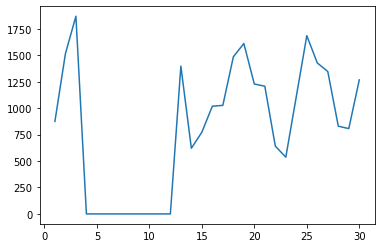

In [137]:
#total number of loans for one entire day for one month as lineplot
x = range(1, 31)
y = month_arr
plt.plot(x, y)

In [155]:
from datetime import timedelta

#note: prices from Indego's official website from 2021

minutes30 = timedelta(minutes=30)

df_walk_up = df_bikes[df_bikes["user_type"] == "Walk-up"]
df_more_than_30_mins = df_walk_up[df_walk_up["duration"] > minutes30]
df_more_than_30_mins["overtime"] = df_more_than_30_mins["duration"] - minutes30
#df_more_than_30_mins

def get_paid_overtime(id):
    costs = ((df_more_than_30_mins.loc([id], df_more_than_30_mins["overtime"]).total_seconds())/60) *0.15
    return costs

get_paid_overtime(10)

#minutes30 = time(0, 30, 0)

#costs = []
#for i in df_bikes["user_type"]:
  #  if df_bikes["user_type"] == "Walk-up":
    #if df_bikes["user_type"].item("Walk-up"):
       # if df_bikes["duration"] > minutes30:
         #   costs.append((df_bikes["duration"] - minutes30)*0.15)

#def calc_costs (v1,v2):
#    df_bikes[v2]= np.where((df_bikes[v1] == "Walk-up", df_bikes["duration"] - minutes30)*0.15, 0)
#    return df_bikes

#df_w_costs = calc_costs("user_type", "costs")
#print(df_w_costs)

#df_bikes_walkup = df_bikes.drop(df_bikes["user_type"] == "Indego30", axis=1)

<ipython-input-155-6818748128db>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_more_than_30_mins["overtime"] = df_more_than_30_mins["duration"] - minutes30


TypeError: __call__() takes from 1 to 2 positional arguments but 3 were given